# Project Overview

This dataset provides insights into customer satisfaction levels within an undisclosed airline company. The optimal goal is to examine the quality and satisfaction rates in this database.

To further understand the objective behind the project, we can divide the flying experience to three main sections:

1. Pre-flight 
2. During flight
3. Post-flight

The main focus is to analyze the flight experience in the during phase and the following questions will be answered to guide the analysis of the report:

1. How is satisfaction affected by class?
2. How is satisfaction affected by entertainment?
3. How is satisfaction affected by food?
4. How is satisfaction affected by distance?

# 1. Importing Dependencies

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Reading the csv file

In [107]:
df = pd.read_csv(r"Airline_customer_satisfaction.csv")
df = df.sample(500)

# 3. EDA

In [108]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
109910,satisfied,Loyal Customer,32,Business travel,Business,4026,5,2,5,5,...,5,3,3,4,5,5,5,5,0,0.0
121109,satisfied,Loyal Customer,27,Business travel,Business,4055,2,2,2,2,...,5,5,4,5,2,5,5,5,4,3.0
92355,satisfied,Loyal Customer,54,Business travel,Business,2571,5,5,5,5,...,4,4,4,4,4,4,4,4,0,0.0
33271,dissatisfied,Loyal Customer,63,Personal Travel,Eco Plus,325,4,2,4,4,...,3,5,5,4,5,2,5,4,117,114.0
36610,dissatisfied,Loyal Customer,57,Personal Travel,Business,1222,4,5,4,1,...,4,5,5,4,5,5,5,3,0,0.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 109910 to 76030
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       500 non-null    object 
 1   Customer Type                      500 non-null    object 
 2   Age                                500 non-null    int64  
 3   Type of Travel                     500 non-null    object 
 4   Class                              500 non-null    object 
 5   Flight Distance                    500 non-null    int64  
 6   Seat comfort                       500 non-null    int64  
 7   Departure/Arrival time convenient  500 non-null    int64  
 8   Food and drink                     500 non-null    int64  
 9   Gate location                      500 non-null    int64  
 10  Inflight wifi service              500 non-null    int64  
 11  Inflight entertainment             500 non-null    int64

In [110]:
df.shape

(500, 22)

In [111]:
df.describe().round()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,498.0
mean,39.0,1882.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,18.0,19.0
std,15.0,1000.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,48.0,49.0
min,7.0,83.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
25%,26.0,1235.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,39.0,1862.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0
75%,51.0,2422.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,16.0,14.0
max,77.0,5193.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,726.0,691.0


# 4. Data cleaning

In [112]:
# removing unwanted features
df.drop(["Departure/Arrival time convenient", 
         "Gate location", 
         "Online support", 
         "Ease of Online booking", 
         "On-board service", 
         "Baggage handling", 
         "Checkin service", 
         "Online boarding", 
         "Arrival Delay in Minutes"], 
        axis=1, inplace=True)

# 5. Satisfaction and Class Analysis

In [113]:
df[['satisfaction', 'Class']]

,satisfaction,Class
109910,satisfied,Business
121109,satisfied,Business
92355,satisfied,Business
33271,dissatisfied,Eco Plus
36610,dissatisfied,Business
...,...,...
57107,satisfied,Business
55239,dissatisfied,Business
123863,satisfied,Business
18233,satisfied,Eco


In [114]:
Satisfaction_Class_Matrix = pd.crosstab(df['Class'], df['satisfaction'])
Satisfaction_Class_Matrix

satisfaction,dissatisfied,satisfied
Class,,
Business,73,149
Eco,132,110
Eco Plus,22,14


## Heatmap

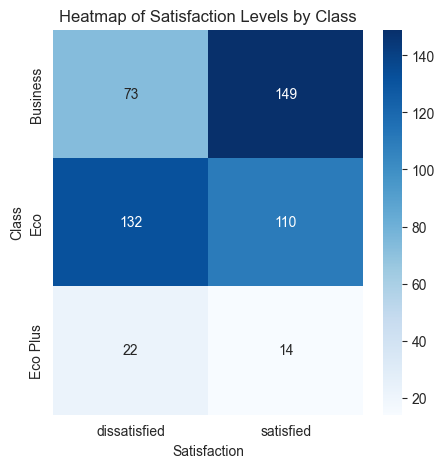

In [115]:
plt.figure(figsize = (5, 5))
sns.heatmap(Satisfaction_Class_Matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')

# annot stands for annotations
# fmt stands for format
# cmap stands for color 

plt.title('Heatmap of Satisfaction Levels by Class')
plt.xlabel('Satisfaction')
plt.ylabel('Class')
plt.savefig('heatmap_colormaps.png', format = 'png', dpi = 2000)
plt.show()

## Count Plot

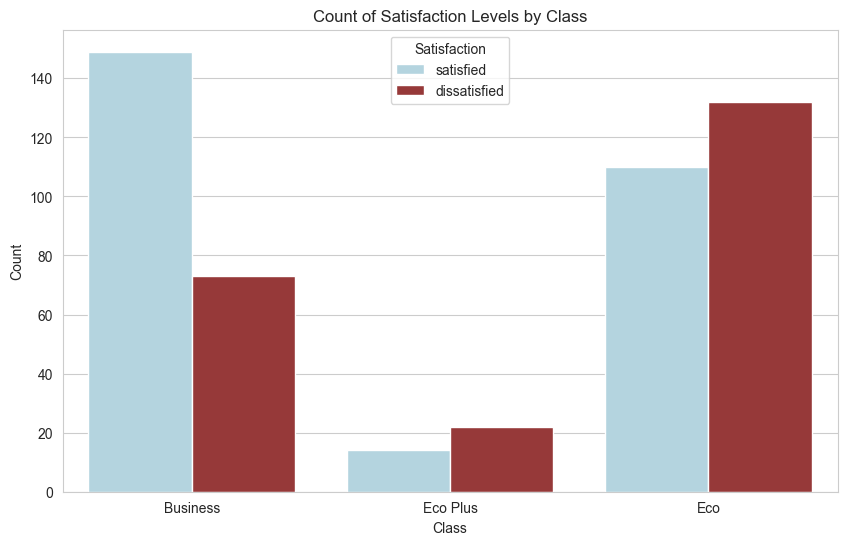

In [116]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df,
              x = 'Class',
              hue = 'satisfaction',
              palette = {"dissatisfied": "Brown", "satisfied": "LightBlue"})

plt.title('Count of Satisfaction Levels by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title = 'Satisfaction')
plt.savefig('Count_of_Satisfaction_Levels_by_Class.png', format = 'png', dpi = 2000)
plt.show()

# 6. Satisfaction and Food Analysis

In [117]:
df2 = df[['satisfaction', 'Food and drink']]

In [118]:
# Since the Food and drink column is a rating from 1 to 5, let us remove any 0 rating
filtered_df = df2.loc[df2['Food and drink'] != 0]
filtered_df

,satisfaction,Food and drink
109910,satisfied,5
121109,satisfied,2
92355,satisfied,5
33271,dissatisfied,4
36610,dissatisfied,4
...,...,...
57107,satisfied,4
55239,dissatisfied,3
123863,satisfied,4
18233,satisfied,1


## Histogram

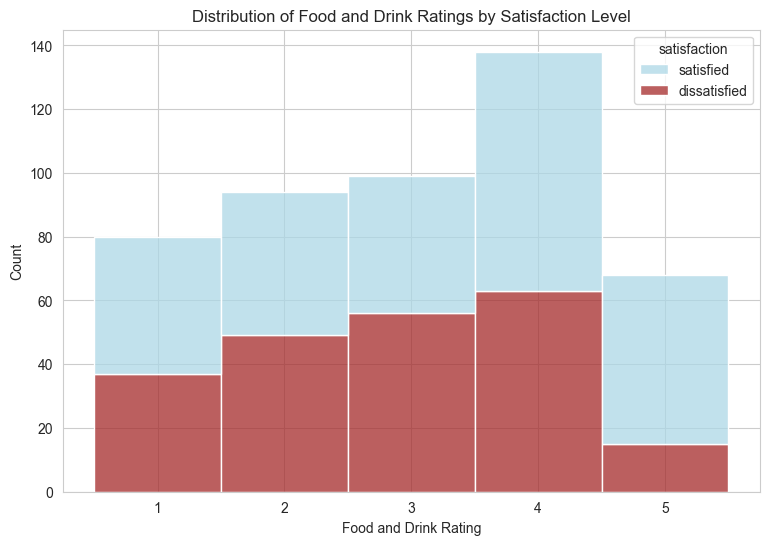

In [119]:
plt.figure(figsize = (9, 6))

# Use numpy to define bin edges
bin_edges = np.arange(0.5, 6.5, 1)  # Create bins that are centered around integers
sns.histplot(data = filtered_df, 
             x = 'Food and drink', 
             hue = 'satisfaction', 
             multiple = 'stack', 
             palette = {"dissatisfied": "Brown", "satisfied": "LightBlue"}, 
             bins = bin_edges)

plt.title('Distribution of Food and Drink Ratings by Satisfaction Level')
plt.xlabel('Food and Drink Rating')
plt.ylabel('Count')
plt.xticks(ticks = np.arange(1, 6, 1))  # Set x-axis ticks to whole numbers
plt.savefig('Distribution_of_Food_and_Drink_Ratings_by_Satisfaction_Level.png', format = 'png', dpi = 2000)
plt.show()

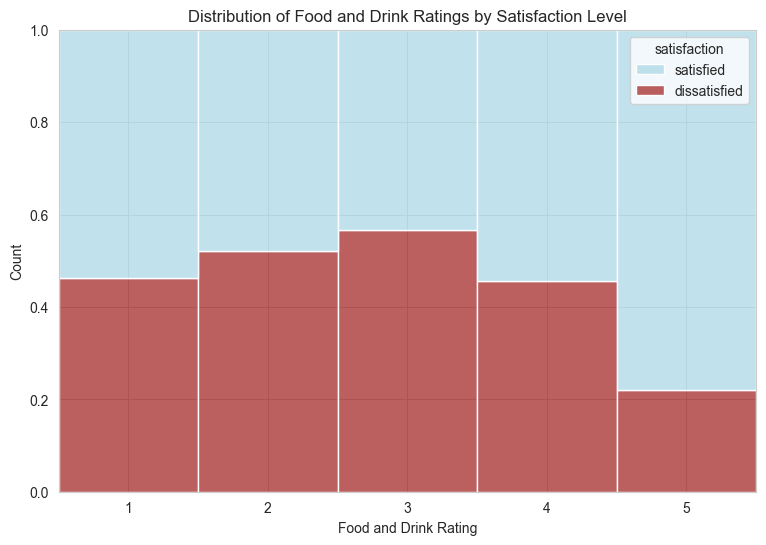

In [120]:
plt.figure(figsize = (9, 6))

# Use numpy to define bin edges
bin_edges = np.arange(0.5, 6.5, 1)  # Create bins that are centered around integers
sns.histplot(data = filtered_df, 
             x = 'Food and drink', 
             hue = 'satisfaction', 
             multiple = 'fill', 
             palette = {'dissatisfied': 'Brown', 'satisfied': 'LightBlue'}, 
             bins = bin_edges)

plt.title('Distribution of Food and Drink Ratings by Satisfaction Level')
plt.xlabel('Food and Drink Rating')
plt.ylabel('Count')
plt.xticks(ticks = np.arange(1, 6, 1))  # Set x-axis ticks to whole numbers
plt.savefig('Distribution_of_Food_and_Drink_Ratings_by_Satisfaction_Level.png', format = 'png', dpi = 2000)
plt.show()

## Heatmap

In [121]:
Satisfaction_Food_Matrix = pd.crosstab(filtered_df['Food and drink'], df['satisfaction'])
Satisfaction_Food_Matrix

satisfaction,dissatisfied,satisfied
Food and drink,,
1,37,43
2,49,45
3,56,43
4,63,75
5,15,53


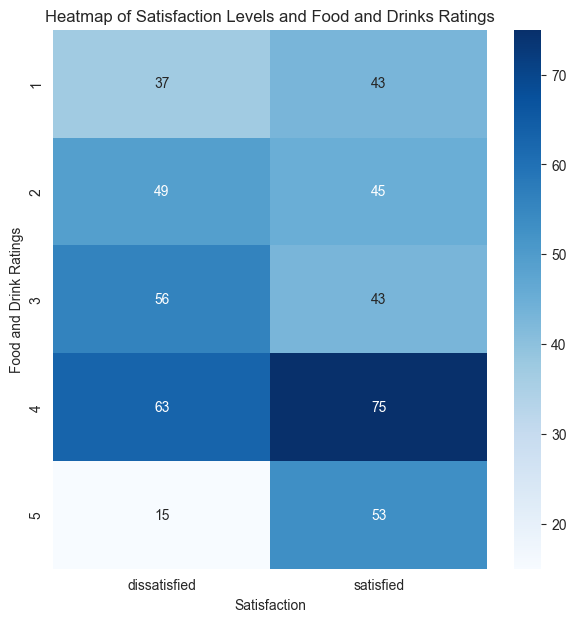

In [122]:
plt.figure(figsize = (7, 7))
sns.heatmap(Satisfaction_Food_Matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')

plt.title('Heatmap of Satisfaction Levels and Food and Drinks Ratings')
plt.xlabel('Satisfaction')
plt.ylabel('Food and Drink Ratings')
plt.savefig('heatmap_food_colormaps.png', format = 'png', dpi = 2000)
plt.show()

# 7. Flight Distance and Satisfaction Analysis

In [123]:
filtered_df = df[['satisfaction' ,'Flight Distance']].set_index('satisfaction')
filtered_df

,Flight Distance
satisfaction,
satisfied,4026
satisfied,4055
satisfied,2571
dissatisfied,325
dissatisfied,1222
...,...
satisfied,1669
dissatisfied,3011
satisfied,2792


In [124]:
df['Flight Distance'].dtype

dtype('int64')

In [125]:
df['Flight Distance'].value_counts()

Flight Distance
584     3
2350    2
421     2
1696    2
1575    2
       ..
435     1
2808    1
2004    1
3289    1
1767    1
Name: count, Length: 458, dtype: int64

## Swarmplot

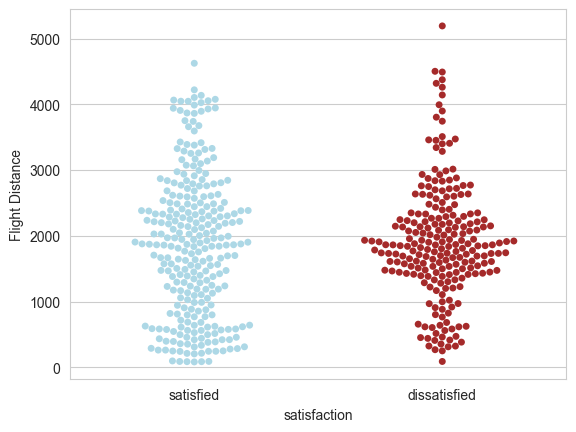

In [126]:
sns.set_style('whitegrid')
sns.swarmplot(data = df,
              y = 'Flight Distance',
              x = 'satisfaction',
              hue = 'satisfaction',
              palette = {'dissatisfied': 'Brown', 'satisfied': 'LightBlue'})
plt.show()

## Histogram

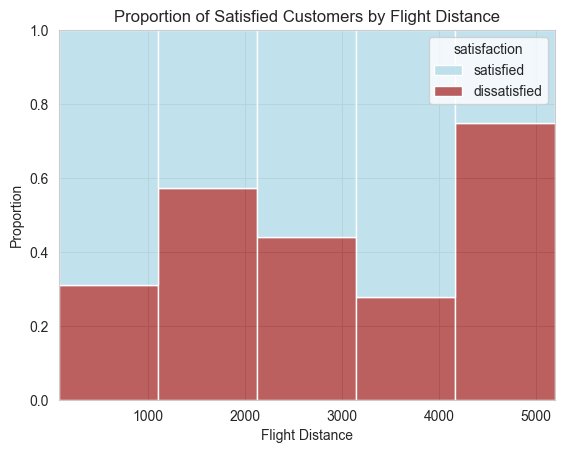

In [127]:
sns.set_style('whitegrid')
plot1 = sns.histplot(data = df,
                     x = 'Flight Distance', 
                     hue = 'satisfaction',
                     multiple = 'fill',
                     palette = {'dissatisfied': 'Brown', 'satisfied': 'LightBlue'},
                     binwidth = 1000)

plt.title('Proportion of Satisfied Customers by Flight Distance')
plot1.set_ylabel('Proportion')
plt.show()

# 8. Enterntainment and Satisfaction Analysis

In [128]:
filtered_df = df[['satisfaction','Inflight entertainment']]

# Since the Inflight entertainment column is a rating from 1 to 5, let us remove any 0 rating
filtered_df2 = filtered_df.loc[filtered_df['Inflight entertainment'] != 0]
filtered_df2

,satisfaction,Inflight entertainment
109910,satisfied,5
121109,satisfied,5
92355,satisfied,5
33271,dissatisfied,4
36610,dissatisfied,5
...,...,...
57107,satisfied,4
55239,dissatisfied,3
123863,satisfied,5
18233,satisfied,5


<Figure size 1000x1000 with 0 Axes>

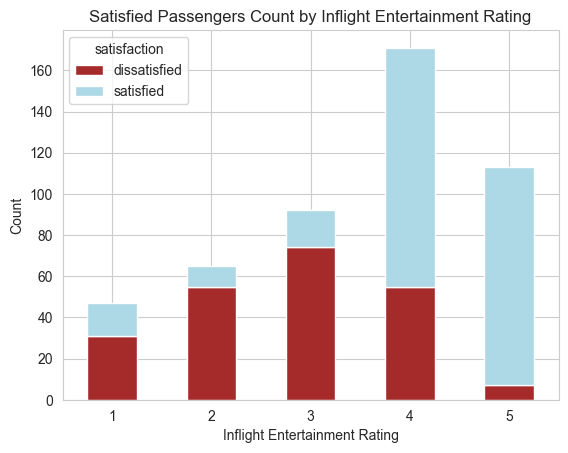

In [129]:
filtered_grouped_df2 = filtered_df2.groupby(['Inflight entertainment', 'satisfaction']).size().unstack()

plt.figure(figsize = (10, 10))
filtered_grouped_df2.plot(kind = 'bar',
                          stacked = True,
                          color = ['Brown', 'LightBlue'])

plt.title('Satisfied Passengers Count by Inflight Entertainment Rating')
plt.xlabel('Inflight Entertainment Rating')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

<Figure size 1000x1500 with 0 Axes>

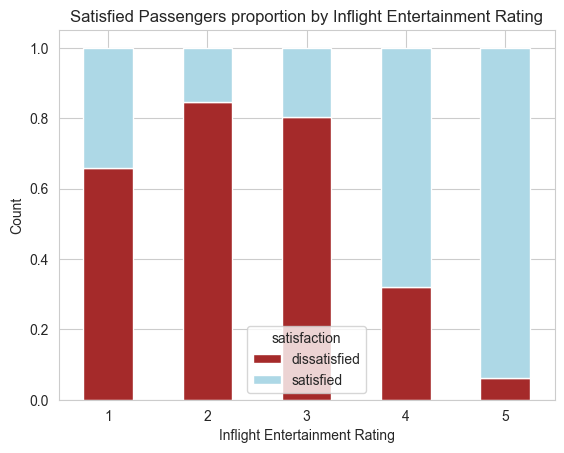

In [130]:
proportions_df2 = filtered_grouped_df2.div(filtered_grouped_df2.sum(axis = 1), axis = 0)

plt.figure(figsize = (10, 15))
proportions_df2.plot(kind = 'bar',
                             stacked = True,
                             color = ['Brown', 'LightBlue'])

plt.title('Satisfied Passengers proportion by Inflight Entertainment Rating')
plt.xlabel('Inflight Entertainment Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 9. Extended Analysis